In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [204]:
from datasets.nuscenes_ood import *
from tools.utils import *

%matplotlib inline
import matplotlib.pyplot as plt

from time import time

In [205]:
nusc, dataroot = get_nusc("mini", "../../data/nuscenes")
val_data = NuScenesDatasetOOD(nusc, False)

In [206]:
t_0 = time()
images, intrinsics, extrinsics, labels, oods, cam_oods = val_data[80]
time() - t_0

  0%|          | 0/50 [00:00<?, ?it/s]

3.586146116256714

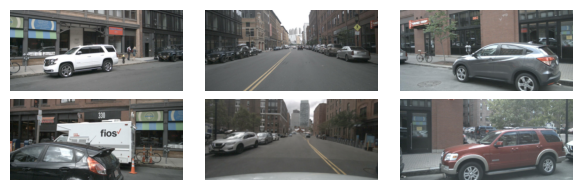

In [198]:
fig, axes = plt.subplots(2, 3, figsize=(6, 2))

for i, ax in enumerate(axes.flatten()):
    ax.axis('off')
    ax.imshow(images[i].permute(1, 2, 0).numpy())
    
plt.tight_layout()

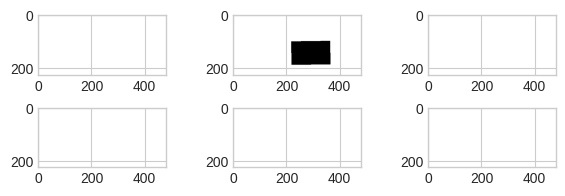

In [191]:
fig, axes = plt.subplots(2, 3, figsize=(6, 2))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(cam_oods[i])
    
plt.tight_layout()

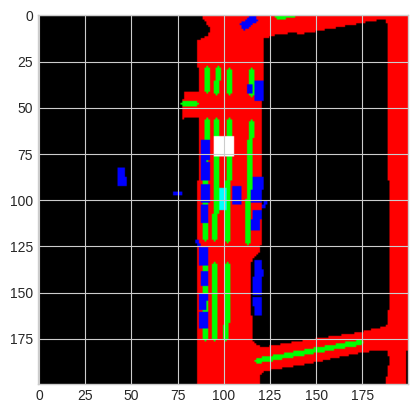

In [199]:
l_image = map_rgb(torch.tensor(labels), ego=True) / 255
l_image[oods == 1, :] = 1
plt.imshow(l_image)